In [159]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import warnings
warnings.filterwarnings('ignore')


# from ml_utils.visualization import show_hist_by_target

In [160]:
class Config:
    TRAIN_CSV= 'train.csv'
    TEST_CSV= 'test.csv'
    INFO= 'clinical_info.xlsx'

In [164]:
def preprocess_csv(path, mode='train'):
    df= pd.read_csv(path)
    if mode == 'train':
        drop_cols= ['ID', 'img_path', 'mask_path', '수술연월일']
        df.drop(drop_cols, axis=1, inplace= True)
    
        return df

    if mode == 'test':
        drop_cols= ['ID', 'img_path', '수술연월일']
        df.drop(drop_cols, axis=1, inplace= True)

        return df

In [167]:
df= preprocess_csv(Config.TRAIN_CSV)
print(df.shape)
df.head(3)

(1000, 24)


,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS_여부,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,63,1,2,1,19.0,2.0,1.0,2.0,2.0,1.0,2,NaN,1.0,1.0,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,51,1,1,1,22.0,3.0,3.0,3.0,3.0,3.0,0,NaN,2.0,0.0,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,37,1,2,1,NaN,2.0,NaN,NaN,NaN,NaN,1,2.0,0.0,1.0,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0


In [168]:
df= preprocess_csv(Config.TEST_CSV, 'test')
print(df.shape)
df.head(3)

(250, 23)


,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS_여부,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
0,55,2,2,1,23.0,2.0,2.0,3.0,2.0,1.0,0,NaN,2.0,1.0,8.0,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN
1,43,4,2,1,13.0,3.0,2.0,2.0,3.0,1.0,2,1.0,1.0,1.0,4.0,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN
2,76,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,0.0,1.0,6.0,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN


In [119]:
train= pd.read_csv(Config.TRAIN_CSV)
test= pd.read_csv(Config.TEST_CSV)
info= pd.read_excel(Config.INFO)

In [122]:
train_dummy_col= ['img_path', 'mask_path', '수술연월일']
test_dummy_col= ['img_path', '수술연월일']

train.drop(train_dummy_col, axis=1, inplace= True)
test.drop(test_dummy_col, axis=1, inplace= True)

In [158]:
train.describe()
# HER2_SISH,	HER2_SISH_ratio,	BRCA_mutation	

,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS_여부,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
count,1000.000000,1000.000000,1000.000000,1000.000000,931.000000,949.000000,914.000000,908.000000,908.000000,911.000000,1000.000000,126.000000,996.000000,999.00000,703.000000,999.000000,547.000000,765.000000,986.000000,976.000000,247.000000,175.000000,55.000000,1000.000000
mean,53.679000,1.289000,1.561000,1.133000,18.375564,2.070601,1.897155,2.588106,2.144273,1.428101,0.719000,1.452381,1.279116,0.81982,7.014225,0.641642,6.049360,18.037229,0.247465,1.253074,0.129555,2.460457,0.145455,0.514000
std,11.253471,0.796312,0.559099,0.339745,12.037144,0.692234,0.713147,0.654011,0.655820,0.714866,0.915903,0.499714,0.632778,0.38453,1.125879,0.479758,2.734821,18.846473,0.431758,0.939444,0.336495,7.399121,0.524164,0.500054
min,25.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,1.000000,1.000000,11.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.00000,7.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.130000,0.000000,0.000000
50%,52.000000,1.000000,2.000000,1.000000,17.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.00000,7.000000,1.000000,6.000000,10.000000,0.000000,1.000000,0.000000,1.270000,0.000000,1.000000
75%,62.000000,1.000000,2.000000,1.000000,23.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.00000,8.000000,1.000000,7.000000,25.000000,0.000000,2.000000,0.000000,1.675000,0.000000,1.000000
max,93.000000,4.000000,3.000000,2.000000,110.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,4.000000,1.00000,8.000000,1.000000,54.000000,97.000000,1.000000,3.000000,1.000000,94.000000,2.000000,1.000000


In [124]:
train['N_category'].value_counts() / train.shape[0]

1    0.514
0    0.486
Name: N_category, dtype: float64

In [126]:
def show_col_hist_by_target(df, col):
    condition_0= (df['N_category']== 0)
    condition_1= (df['N_category']== 1)

    fig, ax= plt.subplots(figsize= (12, 4), nrows=1, ncols= 2,squeeze= False)

    sns.distplot(x= 'N_category', y= col, ax=ax[0][1], label='0', color= 'blue')
    sns.distplot(x= 'N_category', y= col, ax=ax[0][1], label='1', color= 'red')
    

## type

### int 
    - 나이
    - 암의 장경
    - KI-67_LI_percent
    - HER2_SISH_ratio	

### category
    - else

In [130]:
int_cols= ['나이', '암의 개수', '암의 장경', 'KI-67_LI_percent', 'HER2_SISH_ratio']

In [131]:
cat_cols= list(set(apps.columns) - set(int_cols))

In [132]:
def change_type(df, cols, type):
    for col in cols:
        df= df.astype({col:type})

    return df


In [140]:
def show_hist_by_target(df, columns):
    cond_0 = (df['N_category'] == 0)
    cond_1 = (df['N_category'] == 1)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x='N_category', y=column, data=df, ax=axs[0][0] )
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red')

<AxesSubplot:>

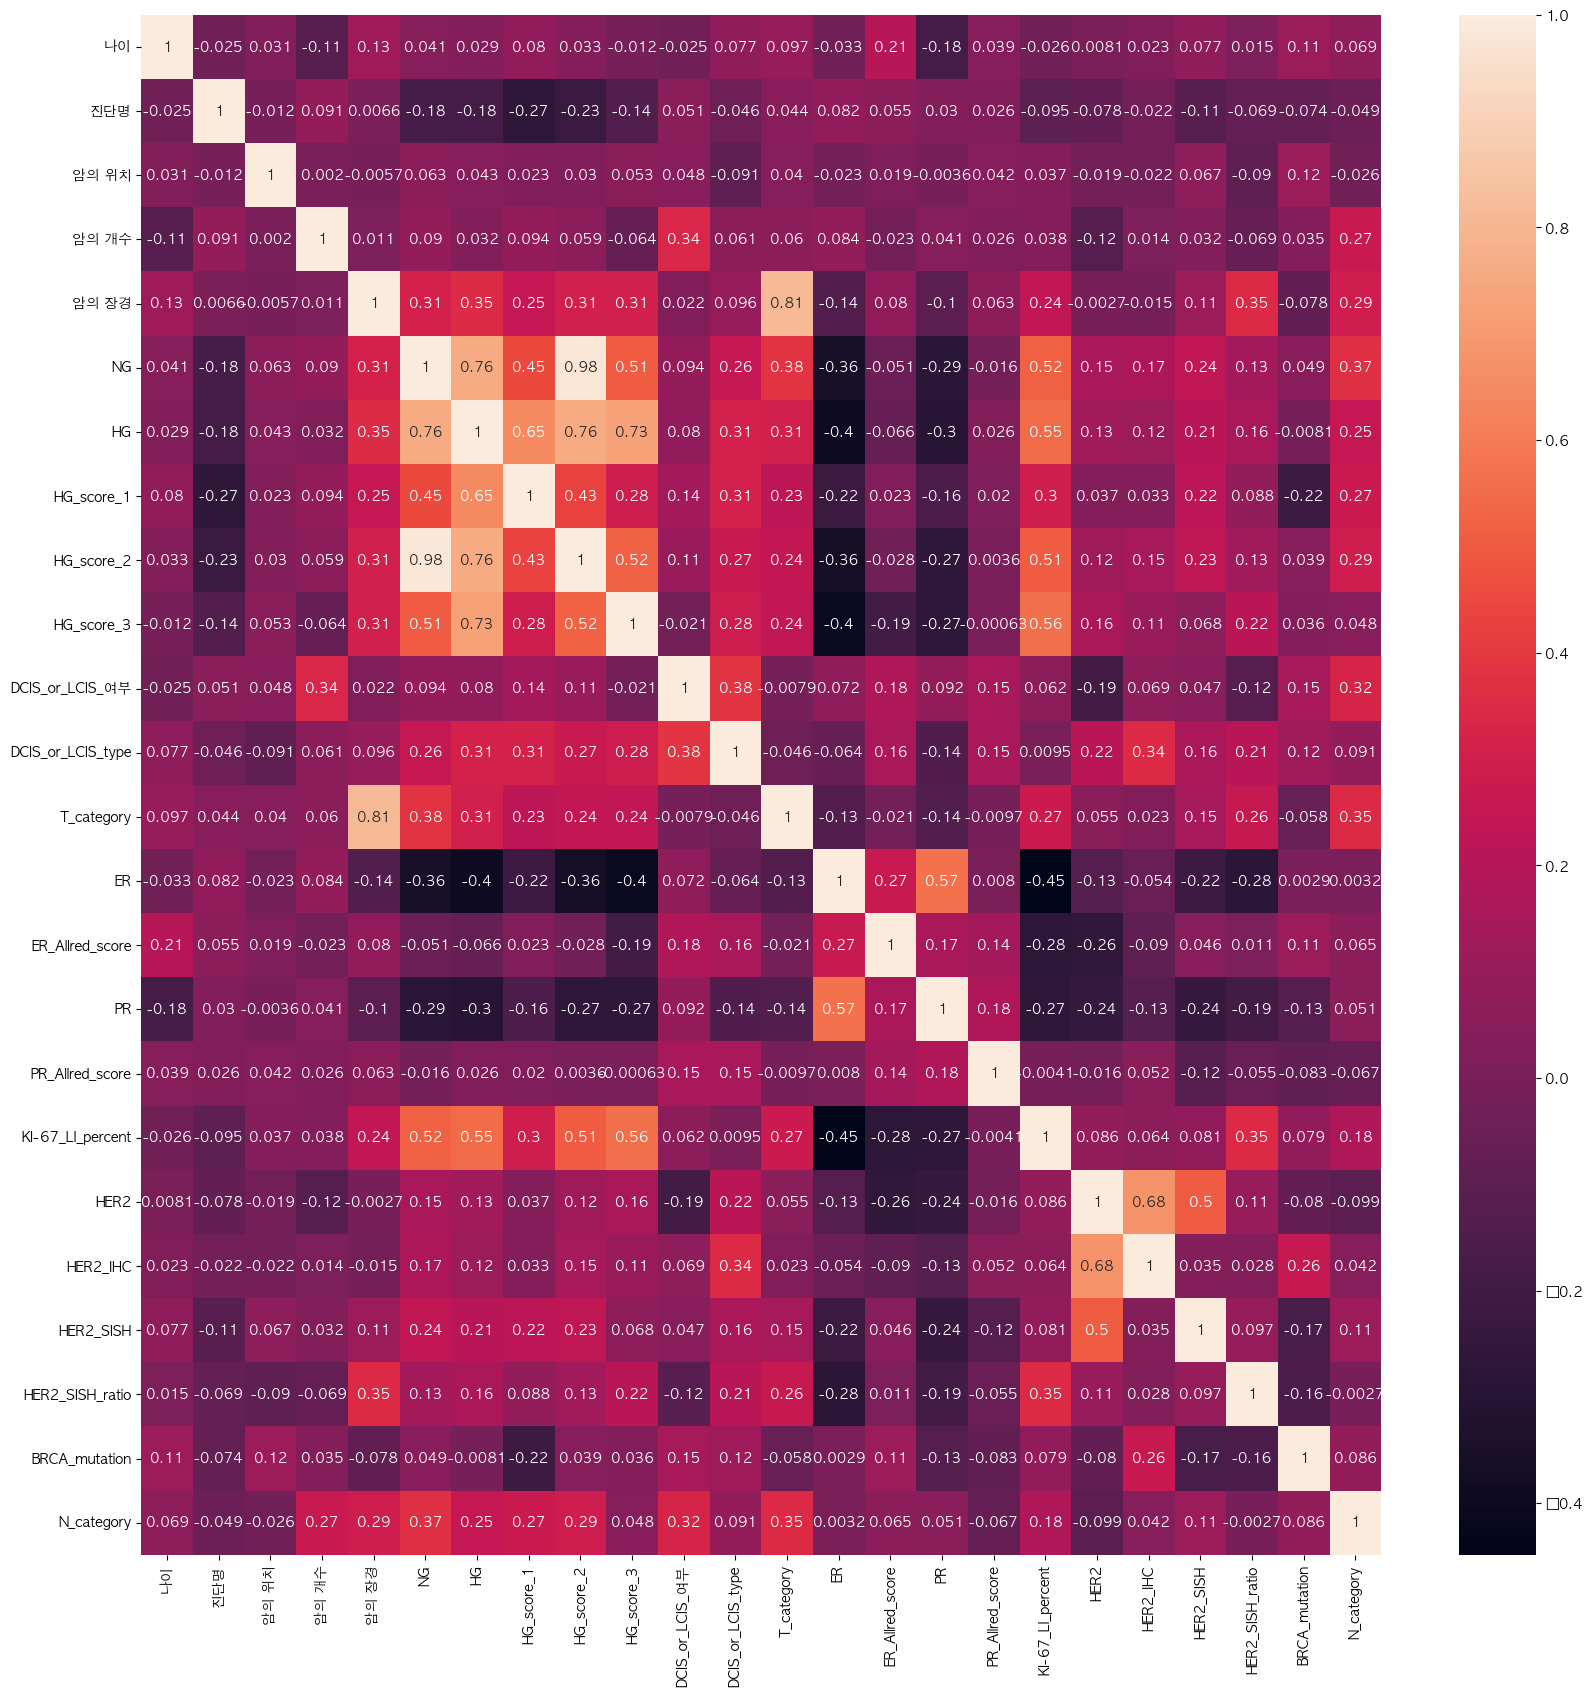

In [157]:
plt.figure(figsize=(20, 20))
sns.heatmap(train[train.columns[1:]].corr(), annot= True)